In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

In [8]:
# Step 1: Data Collection
nifty100 = yf.download("^CNX100", start="2024-06-01", end="2024-08-14", interval="1d")

# Use the 'Close' prices for forecasting
data = nifty100['Close'].fillna(method='ffill')


[*********************100%%**********************]  1 of 1 completed
C:\Users\aditi\AppData\Local\Temp\ipykernel_33820\2465014769.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = nifty100['Close'].fillna(method='ffill')


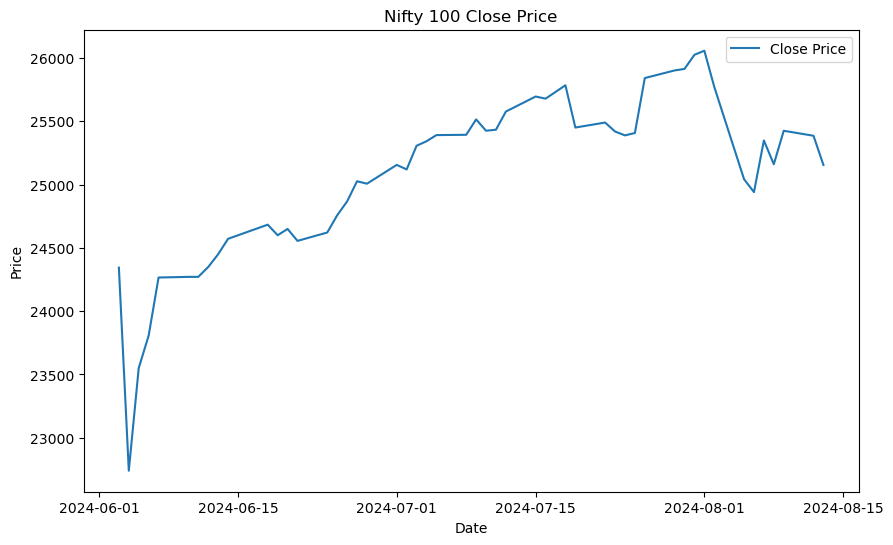

In [9]:
# Step 2: Data Preprocessing
# Plot the data to check for stationarity and trends
plt.figure(figsize=(10, 6))
plt.plot(data, label='Close Price')
plt.title('Nifty 100 Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


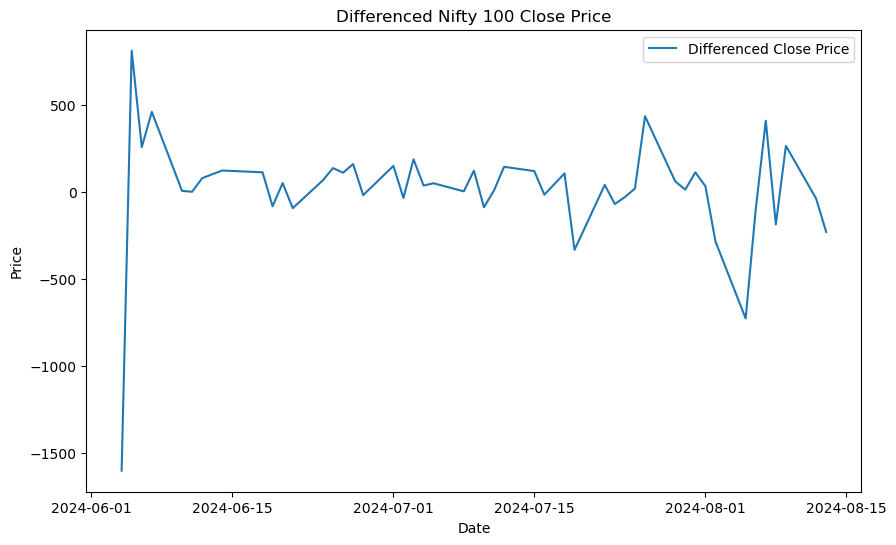

In [16]:
# Differencing to make the data stationary (if needed)
data_diff = data.diff().dropna()

# Plot differenced data to check stationarity
plt.figure(figsize=(10, 6))
plt.plot(data_diff, label='Differenced Close Price')
plt.title('Differenced Nifty 100 Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
# Step 3: Model Selection
# Use AIC/BIC for model selection. Here we use a fixed example of (p, d, q) for demonstration
p, d, q = 5, 1, 0  # Example parameters, use auto-correlation plots or a grid search to find optimal values

# Fit the ARIMA model
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -339.797
Date:                Wed, 14 Aug 2024   AIC                            691.594
Time:                        15:27:13   BIC                            702.945
Sample:                             0   HQIC                           695.901
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4664      0.080     -5.812      0.000      -0.624      -0.309
ar.L2          0.0783      0.158      0.495      0.621      -0.232       0.388
ar.L3          0.1445      0.127      1.138      0.2

c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


           Forecast
2024-08-14      NaN
2024-08-15      NaN
2024-08-16      NaN
2024-08-17      NaN
2024-08-18      NaN
2024-08-19      NaN
2024-08-20      NaN
2024-08-21      NaN
2024-08-22      NaN
2024-08-23      NaN


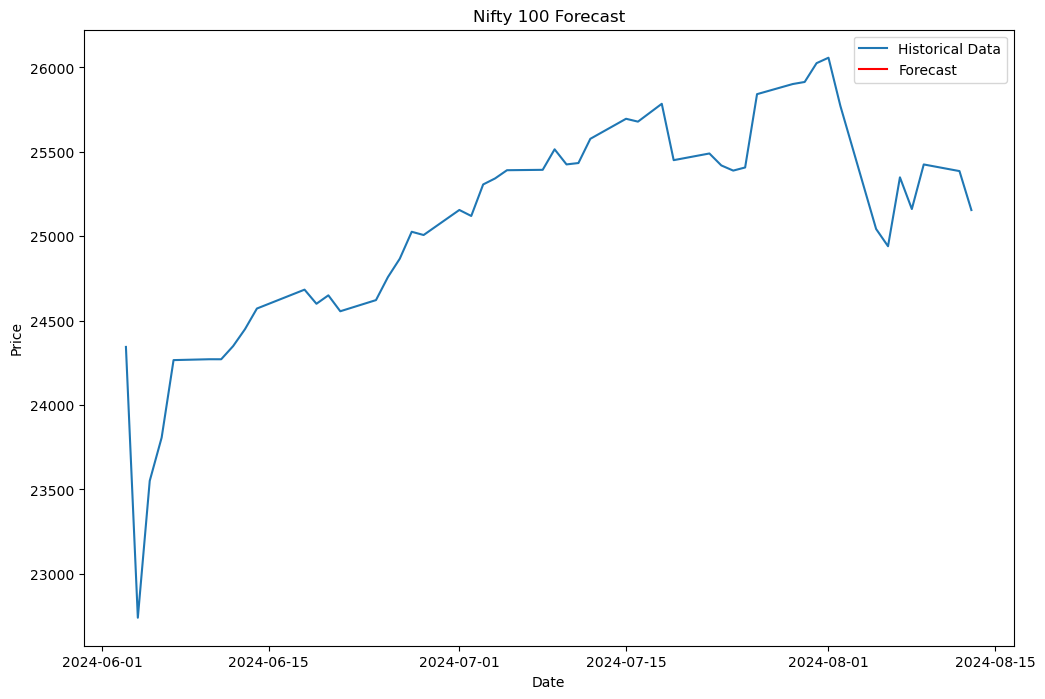

In [18]:
# Step 4: Forecasting
forecast_steps = 10  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Generate forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create a DataFrame for forecasted data
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])
print(forecast_df)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(data, label='Historical Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Nifty 100 Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
# Evaluate model performance on historical data
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse_value = rmse(test, predictions)
print(f'Root Mean Squared Error (RMSE): {rmse_value}')

Root Mean Squared Error (RMSE): 967.9871720740538


c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\aditi\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
